<a href="https://colab.research.google.com/github/Sambhaji6529/Movie_Rating_Prediction/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [9]:
#Load Dataset
df = pd.read_csv('/content/drive/MyDrive/IMDb Movies India.csv')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [10]:
#Check for Missing Values
df.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [11]:
#Check for Missing Values
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [26]:
#Fill Missing Values
for col in ['Director', 'Genre']:
    df[col] = df[col].fillna('Unknown')

num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,director_success_rate,genre_popularity
0,,-1991.0,NaN,Drama,6.0,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,5.850000,6.149065
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.000000,6.149065
2,#Homecoming,-2021.0,90 min,"Drama, Musical",6.0,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.000000,6.366667
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.400000,5.762143
4,...And Once Again,-2010.0,105 min,Drama,6.0,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,6.285714,6.149065
...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,4.075000,5.706439
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.225000,5.543987
15506,Zulmi Raj,-2005.0,NaN,Action,6.0,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,6.000000,5.706439
15507,Zulmi Shikari,-1988.0,NaN,Action,6.0,NaN,Unknown,NaN,NaN,NaN,6.004000,5.706439


In [25]:
#Feature Engineering
# Director Success Rate
director_avg_rating = df.groupby('Director')['Rating'].mean().to_dict()
df['director_success_rate'] = df['Director'].map(director_avg_rating)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,director_success_rate,genre_popularity
0,,-1991.0,NaN,Drama,6.0,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,5.850000,6.149065
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.000000,6.149065
2,#Homecoming,-2021.0,90 min,"Drama, Musical",6.0,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.000000,6.366667
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.400000,5.762143
4,...And Once Again,-2010.0,105 min,Drama,6.0,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,6.285714,6.149065
...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,4.075000,5.706439
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.225000,5.543987
15506,Zulmi Raj,-2005.0,NaN,Action,6.0,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,6.000000,5.706439
15507,Zulmi Shikari,-1988.0,NaN,Action,6.0,NaN,Unknown,NaN,NaN,NaN,6.004000,5.706439


In [28]:
# Genre Popularity
genre_avg_rating = df.groupby('Genre')['Rating'].mean().to_dict()
df['genre_popularity'] = df['Genre'].map(genre_avg_rating)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,director_success_rate,genre_popularity
0,,-1991.0,NaN,Drama,6.0,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,5.850000,6.149065
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.000000,6.149065
2,#Homecoming,-2021.0,90 min,"Drama, Musical",6.0,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.000000,6.366667
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.400000,5.762143
4,...And Once Again,-2010.0,105 min,Drama,6.0,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,6.285714,6.149065
...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,4.075000,5.706439
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.225000,5.543987
15506,Zulmi Raj,-2005.0,NaN,Action,6.0,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,6.000000,5.706439
15507,Zulmi Shikari,-1988.0,NaN,Action,6.0,NaN,Unknown,NaN,NaN,NaN,6.004000,5.706439


In [32]:
# Movie Age
df['movie_age'] = 2024 - df['Year']
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,director_success_rate,genre_popularity,movie_age
0,,-1991.0,NaN,Drama,6.0,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,5.850000,6.149065,4015.0
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.000000,6.149065,4043.0
2,#Homecoming,-2021.0,90 min,"Drama, Musical",6.0,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.000000,6.366667,4045.0
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.400000,5.762143,4043.0
4,...And Once Again,-2010.0,105 min,Drama,6.0,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,6.285714,6.149065,4034.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,4.075000,5.706439,4012.0
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.225000,5.543987,4023.0
15506,Zulmi Raj,-2005.0,NaN,Action,6.0,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,6.000000,5.706439,4029.0
15507,Zulmi Shikari,-1988.0,NaN,Action,6.0,NaN,Unknown,NaN,NaN,NaN,6.004000,5.706439,4012.0


In [40]:
#Drop Unnecessary Columns
df_model = df.drop(['Name', 'Genre','Director'], axis=1)
df_model


,Year,Duration,Rating,Votes,Actor 1,Actor 2,Actor 3,director_success_rate,genre_popularity,movie_age
0,-1991.0,NaN,6.0,NaN,Manmauji,Birbal,Rajendra Bhatia,5.850000,6.149065,4015.0
1,-2019.0,109 min,7.0,8,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.000000,6.149065,4043.0
2,-2021.0,90 min,6.0,NaN,Sayani Gupta,Plabita Borthakur,Roy Angana,6.000000,6.366667,4045.0
3,-2019.0,110 min,4.4,35,Prateik,Ishita Raj,Siddhant Kapoor,4.400000,5.762143,4043.0
4,-2010.0,105 min,6.0,NaN,Rajat Kapoor,Rituparna Sengupta,Antara Mali,6.285714,6.149065,4034.0
...,...,...,...,...,...,...,...,...,...,...
15504,-1988.0,NaN,4.6,11,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,4.075000,5.706439,4012.0
15505,-1999.0,129 min,4.5,655,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.225000,5.543987,4023.0
15506,-2005.0,NaN,6.0,NaN,Sangeeta Tiwari,NaN,NaN,6.000000,5.706439,4029.0
15507,-1988.0,NaN,6.0,NaN,NaN,NaN,NaN,6.004000,5.706439,4012.0


In [46]:
#Train-Test Split
X = df_model.drop(['Rating'], axis=1)
y = df_model['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
df['Duration'] = df['Duration'].astype(str).str.replace('min', '').str.strip()
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Duration'] = df['Duration'].fillna(df['Duration'].mean())
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,director_success_rate,genre_popularity,movie_age
0,,-1991.0,128.126519,Drama,6.0,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,5.850000,6.149065,4015.0
1,#Gadhvi (He thought he was Gandhi),-2019.0,109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.000000,6.149065,4043.0
2,#Homecoming,-2021.0,90.000000,"Drama, Musical",6.0,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.000000,6.366667,4045.0
3,#Yaaram,-2019.0,110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.400000,5.762143,4043.0
4,...And Once Again,-2010.0,105.000000,Drama,6.0,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,6.285714,6.149065,4034.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,128.126519,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,4.075000,5.706439,4012.0
15505,Zulmi,-1999.0,129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.225000,5.543987,4023.0
15506,Zulmi Raj,-2005.0,128.126519,Action,6.0,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,6.000000,5.706439,4029.0
15507,Zulmi Shikari,-1988.0,128.126519,Action,6.0,NaN,Unknown,NaN,NaN,NaN,6.004000,5.706439,4012.0


In [54]:
df['Duration'].head()
df['Duration'].isnull().sum()


0

In [58]:
df['Duration'].describe()


,Duration
count,15509.000000
mean,128.126519
std,19.753788
min,2.000000
25%,128.126519
50%,128.126519
75%,129.000000
max,321.000000


In [64]:
X_train.head()


,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3,director_success_rate,genre_popularity,movie_age
3485,Dastak,-1996.0,141.000000,"Drama, Romance",293,Mahesh Bhatt,Sushmita Sen,Mukul Dev,Sharad S. Kapoor,5.427083,5.923664,4020.0
8701,Main Suhagan Hoon,-1964.0,128.126519,"Drama, Family",5,Kundan Kumar,Mala Sinha,Ajit,Kewal Kumar,5.363636,6.173684,3988.0
11179,Pyaar Karle,-2019.0,116.000000,Drama,5,Rudra Patla Venugopal,Chitram Basha,Udita Goswami,Faheem Ul Haq,3.600000,6.149065,4043.0
11628,Rakshaa Bandhan,-1977.0,90.000000,Drama,5,Shantilal Soni,Jairaj,Pallavi Joshi,Lalita Pawar,6.268182,6.149065,4001.0
4819,Gaj Gauri,-1958.0,128.126519,Drama,NaN,Anand Kumar,Sulochana Latkar,Shahu Modak,Nana Palsikar,6.100000,6.149065,3982.0


In [62]:
# After cleaning df
X = df.drop('Rating', axis=1)
y = df['Rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
X_train.dtypes


,0
Name,object
Year,float64
Duration,float64
Genre,object
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object
director_success_rate,float64


In [66]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'director_success_rate',
       'genre_popularity', 'movie_age'],
      dtype='object')

In [67]:
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns
df.drop(['Name'], axis=1, inplace=True)

# Convert 'Votes' to numeric
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'] = df['Votes'].fillna(df['Votes'].mean())

# Encode categorical columns
label_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Now split and train:
X = df.drop(['Rating'], axis=1)
y = df['Rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [69]:
#Prediction and Evaluation
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.6213006398917442
MAE: 0.32828094777562855
RMSE: 0.6068368388492298


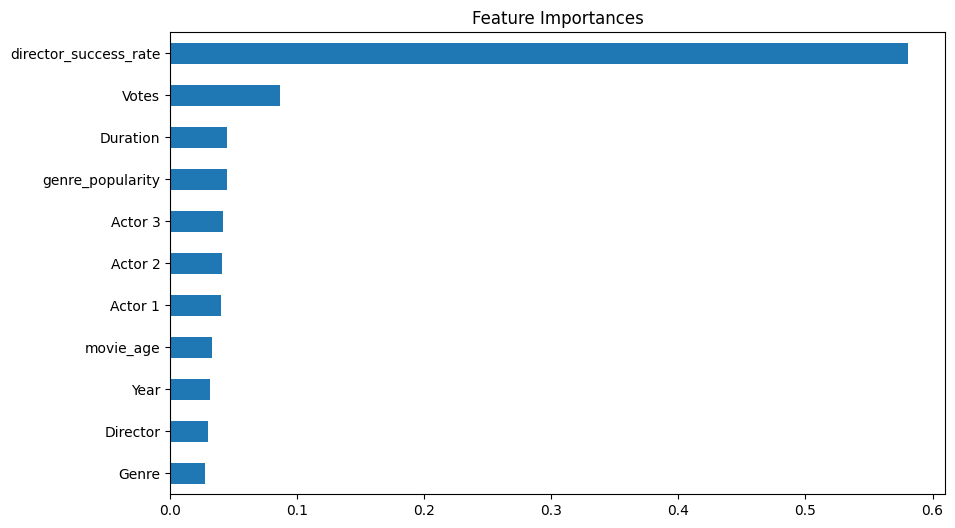

In [70]:
#Feature Importance Plot
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances")
plt.show()

In [71]:
# Save the Model
joblib.dump(model, 'movie_rating_predictor.pkl')


['movie_rating_predictor.pkl']